# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

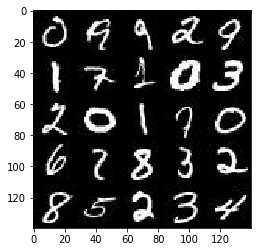

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

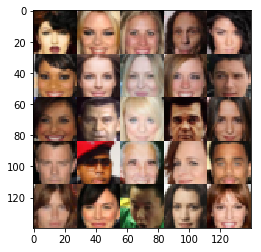

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [11]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    Input = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name='input_real')
    Z = tf.placeholder(tf.float32, [None, z_dim], name='input_z')
    LearningRate = tf.placeholder(tf.float32, name='learn_rate')
    return Input, Z, LearningRate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [12]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        images = tf.layers.conv2d(images, filters=64, kernel_size=4, strides=2, padding="same")
        images = tf.maximum(alpha * images, images)
        images = tf.layers.dropout(images)
        # Output layer is 16x16x64
        
        images = tf.layers.conv2d(images, filters=128, kernel_size=4, strides=2, padding="same")
        images = tf.maximum(alpha * images, images)
        images = tf.layers.dropout(images)
        # Output layer is 8x8x128
        
        images = tf.layers.conv2d(images, filters=256, kernel_size=4, strides=2, padding="same")
        images = tf.maximum(alpha * images, images)
        images = tf.layers.dropout(images)
        # Output layer is 4x4x256
        
        # Flatten the layer
        flat = tf.reshape(images, [-1, 4*4*256])
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [13]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        z = tf.layers.dense(z, 7*7*512)
        # Reshape it to start conv stack
        z = tf.reshape(z, [-1, 7, 7, 512])
        z = tf.layers.batch_normalization(z, training=is_train)
        z = tf.maximum(z * alpha, z)
        # Output is 7x7x512
        
        z = tf.layers.conv2d_transpose(z, filters=256, kernel_size=4, strides=2, padding="same")
        z = tf.layers.batch_normalization(z, training=is_train)
        z = tf.maximum(z * alpha, z)
        # Output is 14x14x256
        
        logits = tf.layers.conv2d_transpose(z, filters=out_channel_dim, kernel_size=4, strides=2, padding="same")
        # Output is 28x28xoutput_dim
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [14]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    # As Discriminator gets better at discriminating, generator gets better at generating
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    # Smoothening factor 
    d_logits_fake *= 0.9
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [15]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [17]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode, print_every=10, show_every=100):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # Rescaling images to be between -1 to 1
                batch_images *= 2.0
                
                # Noise for generator
                batch_z = np.random.uniform(-1, 1, size=[batch_size, z_dim])
                
                # Run optimizers 
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, learn_rate: learning_rate})
                
                if steps % print_every == 0:
                    # Calculate and print out losses
                    d_train_loss = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    g_train_loss = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}, Batch No {},".format(epoch_i+1, epoch_count, steps),
                          "Discriminator Loss ========> {:.4f},".format(d_train_loss),
                          "Generator Loss ========> {:.4f}".format(g_train_loss))
                
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2, Batch No 10, Discriminator Loss ========> 1.0528, Generator Loss ========> 0.5629
Epoch 1/2, Batch No 20, Discriminator Loss ========> 0.8998, Generator Loss ========> 0.5918
Epoch 1/2, Batch No 30, Discriminator Loss ========> 0.3064, Generator Loss ========> 1.5233
Epoch 1/2, Batch No 40, Discriminator Loss ========> 1.6122, Generator Loss ========> 0.5475
Epoch 1/2, Batch No 50, Discriminator Loss ========> 1.2017, Generator Loss ========> 0.6511
Epoch 1/2, Batch No 60, Discriminator Loss ========> 1.4846, Generator Loss ========> 0.6559
Epoch 1/2, Batch No 70, Discriminator Loss ========> 1.3387, Generator Loss ========> 0.6267
Epoch 1/2, Batch No 80, Discriminator Loss ========> 1.2536, Generator Loss ========> 0.6915
Epoch 1/2, Batch No 90, Discriminator Loss ========> 1.3761, Generator Loss ========> 0.6235
Epoch 1/2, Batch No 100, Discriminator Loss ========> 1.0249, Generator Loss ========> 0.8539


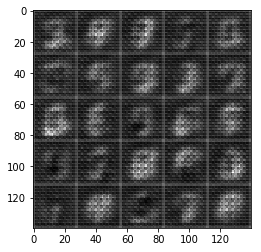

Epoch 1/2, Batch No 110, Discriminator Loss ========> 1.3136, Generator Loss ========> 0.6801
Epoch 1/2, Batch No 120, Discriminator Loss ========> 1.2142, Generator Loss ========> 0.6992
Epoch 1/2, Batch No 130, Discriminator Loss ========> 1.3999, Generator Loss ========> 0.8041
Epoch 1/2, Batch No 140, Discriminator Loss ========> 1.2946, Generator Loss ========> 0.7798
Epoch 1/2, Batch No 150, Discriminator Loss ========> 1.0887, Generator Loss ========> 0.8205
Epoch 1/2, Batch No 160, Discriminator Loss ========> 1.4874, Generator Loss ========> 0.5400
Epoch 1/2, Batch No 170, Discriminator Loss ========> 1.2499, Generator Loss ========> 0.6821
Epoch 1/2, Batch No 180, Discriminator Loss ========> 1.3821, Generator Loss ========> 0.6206
Epoch 1/2, Batch No 190, Discriminator Loss ========> 1.2898, Generator Loss ========> 0.6548
Epoch 1/2, Batch No 200, Discriminator Loss ========> 1.2936, Generator Loss ========> 0.7337


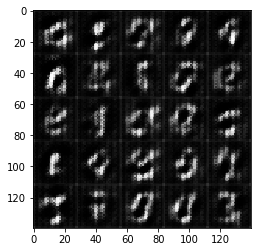

Epoch 1/2, Batch No 210, Discriminator Loss ========> 1.4771, Generator Loss ========> 0.6121
Epoch 1/2, Batch No 220, Discriminator Loss ========> 1.4179, Generator Loss ========> 0.6349
Epoch 1/2, Batch No 230, Discriminator Loss ========> 1.3302, Generator Loss ========> 0.6093
Epoch 1/2, Batch No 240, Discriminator Loss ========> 1.3345, Generator Loss ========> 0.6838
Epoch 1/2, Batch No 250, Discriminator Loss ========> 1.3643, Generator Loss ========> 0.6033
Epoch 1/2, Batch No 260, Discriminator Loss ========> 1.3891, Generator Loss ========> 0.6255
Epoch 1/2, Batch No 270, Discriminator Loss ========> 1.3155, Generator Loss ========> 0.6640
Epoch 1/2, Batch No 280, Discriminator Loss ========> 1.4327, Generator Loss ========> 0.5741
Epoch 1/2, Batch No 290, Discriminator Loss ========> 1.3062, Generator Loss ========> 0.7115
Epoch 1/2, Batch No 300, Discriminator Loss ========> 1.4021, Generator Loss ========> 0.5942


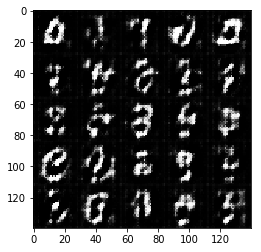

Epoch 1/2, Batch No 310, Discriminator Loss ========> 1.2553, Generator Loss ========> 0.7266
Epoch 1/2, Batch No 320, Discriminator Loss ========> 1.3436, Generator Loss ========> 0.7360
Epoch 1/2, Batch No 330, Discriminator Loss ========> 1.3732, Generator Loss ========> 0.7071
Epoch 1/2, Batch No 340, Discriminator Loss ========> 1.3341, Generator Loss ========> 0.7589
Epoch 1/2, Batch No 350, Discriminator Loss ========> 1.4108, Generator Loss ========> 0.6850
Epoch 1/2, Batch No 360, Discriminator Loss ========> 1.3122, Generator Loss ========> 0.7185
Epoch 1/2, Batch No 370, Discriminator Loss ========> 1.3495, Generator Loss ========> 0.6502
Epoch 1/2, Batch No 380, Discriminator Loss ========> 1.2899, Generator Loss ========> 0.6017
Epoch 1/2, Batch No 390, Discriminator Loss ========> 1.3880, Generator Loss ========> 0.5696
Epoch 1/2, Batch No 400, Discriminator Loss ========> 1.1996, Generator Loss ========> 0.6668


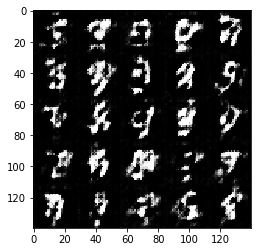

Epoch 1/2, Batch No 410, Discriminator Loss ========> 1.3245, Generator Loss ========> 0.7745
Epoch 1/2, Batch No 420, Discriminator Loss ========> 1.4142, Generator Loss ========> 0.5844
Epoch 1/2, Batch No 430, Discriminator Loss ========> 1.3719, Generator Loss ========> 0.7878
Epoch 1/2, Batch No 440, Discriminator Loss ========> 1.3576, Generator Loss ========> 0.6439
Epoch 1/2, Batch No 450, Discriminator Loss ========> 1.2517, Generator Loss ========> 0.7399
Epoch 1/2, Batch No 460, Discriminator Loss ========> 1.3985, Generator Loss ========> 0.4738
Epoch 1/2, Batch No 470, Discriminator Loss ========> 1.3393, Generator Loss ========> 0.7377
Epoch 1/2, Batch No 480, Discriminator Loss ========> 1.2533, Generator Loss ========> 0.6918
Epoch 1/2, Batch No 490, Discriminator Loss ========> 1.4337, Generator Loss ========> 0.5643
Epoch 1/2, Batch No 500, Discriminator Loss ========> 1.4158, Generator Loss ========> 0.5869


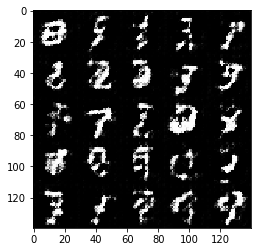

Epoch 1/2, Batch No 510, Discriminator Loss ========> 1.1421, Generator Loss ========> 0.7340
Epoch 1/2, Batch No 520, Discriminator Loss ========> 1.3838, Generator Loss ========> 0.6777
Epoch 1/2, Batch No 530, Discriminator Loss ========> 1.1794, Generator Loss ========> 0.7291
Epoch 1/2, Batch No 540, Discriminator Loss ========> 1.3141, Generator Loss ========> 0.7406
Epoch 1/2, Batch No 550, Discriminator Loss ========> 1.1540, Generator Loss ========> 0.7829
Epoch 1/2, Batch No 560, Discriminator Loss ========> 1.3714, Generator Loss ========> 0.6232
Epoch 1/2, Batch No 570, Discriminator Loss ========> 1.4052, Generator Loss ========> 0.7154
Epoch 1/2, Batch No 580, Discriminator Loss ========> 1.2055, Generator Loss ========> 0.6694
Epoch 1/2, Batch No 590, Discriminator Loss ========> 1.3574, Generator Loss ========> 0.7134
Epoch 1/2, Batch No 600, Discriminator Loss ========> 1.2242, Generator Loss ========> 0.9076


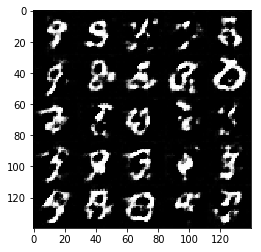

Epoch 1/2, Batch No 610, Discriminator Loss ========> 1.2626, Generator Loss ========> 0.7855
Epoch 1/2, Batch No 620, Discriminator Loss ========> 1.2332, Generator Loss ========> 0.7980
Epoch 1/2, Batch No 630, Discriminator Loss ========> 1.1723, Generator Loss ========> 1.0552
Epoch 1/2, Batch No 640, Discriminator Loss ========> 1.3397, Generator Loss ========> 0.7892
Epoch 1/2, Batch No 650, Discriminator Loss ========> 1.3053, Generator Loss ========> 0.5130
Epoch 1/2, Batch No 660, Discriminator Loss ========> 1.1632, Generator Loss ========> 0.8708
Epoch 1/2, Batch No 670, Discriminator Loss ========> 1.1561, Generator Loss ========> 0.9151
Epoch 1/2, Batch No 680, Discriminator Loss ========> 1.3441, Generator Loss ========> 0.5631
Epoch 1/2, Batch No 690, Discriminator Loss ========> 1.1701, Generator Loss ========> 0.8044
Epoch 1/2, Batch No 700, Discriminator Loss ========> 1.1751, Generator Loss ========> 0.8117


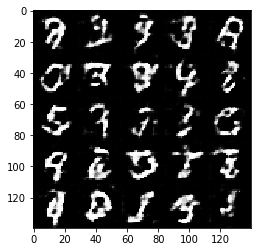

Epoch 1/2, Batch No 710, Discriminator Loss ========> 1.2779, Generator Loss ========> 0.9456
Epoch 1/2, Batch No 720, Discriminator Loss ========> 1.1389, Generator Loss ========> 1.0189
Epoch 1/2, Batch No 730, Discriminator Loss ========> 1.2107, Generator Loss ========> 0.6876
Epoch 1/2, Batch No 740, Discriminator Loss ========> 1.2654, Generator Loss ========> 0.9002
Epoch 1/2, Batch No 750, Discriminator Loss ========> 1.3799, Generator Loss ========> 0.4171
Epoch 1/2, Batch No 760, Discriminator Loss ========> 1.2151, Generator Loss ========> 0.6399
Epoch 1/2, Batch No 770, Discriminator Loss ========> 1.1358, Generator Loss ========> 0.9145
Epoch 1/2, Batch No 780, Discriminator Loss ========> 1.2644, Generator Loss ========> 0.7446
Epoch 1/2, Batch No 790, Discriminator Loss ========> 1.2098, Generator Loss ========> 0.8375
Epoch 1/2, Batch No 800, Discriminator Loss ========> 1.4090, Generator Loss ========> 1.0707


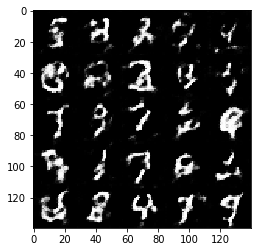

Epoch 1/2, Batch No 810, Discriminator Loss ========> 1.1474, Generator Loss ========> 0.7856
Epoch 1/2, Batch No 820, Discriminator Loss ========> 1.3239, Generator Loss ========> 1.1044
Epoch 1/2, Batch No 830, Discriminator Loss ========> 1.0930, Generator Loss ========> 0.9477
Epoch 1/2, Batch No 840, Discriminator Loss ========> 1.1044, Generator Loss ========> 0.8593
Epoch 1/2, Batch No 850, Discriminator Loss ========> 1.1968, Generator Loss ========> 0.7552
Epoch 1/2, Batch No 860, Discriminator Loss ========> 1.2721, Generator Loss ========> 0.5582
Epoch 1/2, Batch No 870, Discriminator Loss ========> 1.2146, Generator Loss ========> 0.8081
Epoch 1/2, Batch No 880, Discriminator Loss ========> 1.2763, Generator Loss ========> 0.4924
Epoch 1/2, Batch No 890, Discriminator Loss ========> 1.2230, Generator Loss ========> 0.7497
Epoch 1/2, Batch No 900, Discriminator Loss ========> 1.2667, Generator Loss ========> 0.6596


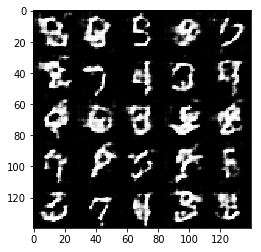

Epoch 1/2, Batch No 910, Discriminator Loss ========> 1.2608, Generator Loss ========> 0.6367
Epoch 1/2, Batch No 920, Discriminator Loss ========> 1.0424, Generator Loss ========> 0.8117
Epoch 1/2, Batch No 930, Discriminator Loss ========> 1.1667, Generator Loss ========> 0.7395
Epoch 2/2, Batch No 10, Discriminator Loss ========> 1.2132, Generator Loss ========> 0.7260
Epoch 2/2, Batch No 20, Discriminator Loss ========> 1.1241, Generator Loss ========> 0.7587
Epoch 2/2, Batch No 30, Discriminator Loss ========> 1.2467, Generator Loss ========> 0.6573
Epoch 2/2, Batch No 40, Discriminator Loss ========> 1.2549, Generator Loss ========> 0.6483
Epoch 2/2, Batch No 50, Discriminator Loss ========> 1.4009, Generator Loss ========> 0.5489
Epoch 2/2, Batch No 60, Discriminator Loss ========> 1.3302, Generator Loss ========> 0.7471
Epoch 2/2, Batch No 70, Discriminator Loss ========> 1.3725, Generator Loss ========> 0.4790
Epoch 2/2, Batch No 80, Discriminator Loss ========> 1.2554, Genera

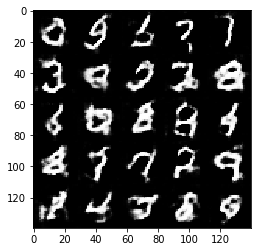

Epoch 2/2, Batch No 110, Discriminator Loss ========> 1.2069, Generator Loss ========> 0.6856
Epoch 2/2, Batch No 120, Discriminator Loss ========> 1.2000, Generator Loss ========> 0.5673
Epoch 2/2, Batch No 130, Discriminator Loss ========> 1.1974, Generator Loss ========> 0.9582
Epoch 2/2, Batch No 140, Discriminator Loss ========> 1.2383, Generator Loss ========> 0.7405
Epoch 2/2, Batch No 150, Discriminator Loss ========> 1.3831, Generator Loss ========> 0.6212
Epoch 2/2, Batch No 160, Discriminator Loss ========> 1.2613, Generator Loss ========> 0.5659
Epoch 2/2, Batch No 170, Discriminator Loss ========> 1.2618, Generator Loss ========> 0.5675
Epoch 2/2, Batch No 180, Discriminator Loss ========> 1.2775, Generator Loss ========> 0.7778
Epoch 2/2, Batch No 190, Discriminator Loss ========> 1.2407, Generator Loss ========> 0.6796
Epoch 2/2, Batch No 200, Discriminator Loss ========> 1.1971, Generator Loss ========> 0.8741


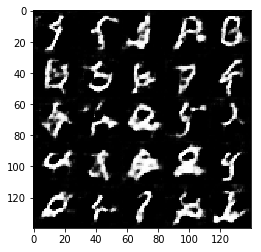

Epoch 2/2, Batch No 210, Discriminator Loss ========> 1.2219, Generator Loss ========> 0.9128
Epoch 2/2, Batch No 220, Discriminator Loss ========> 1.2316, Generator Loss ========> 0.8946
Epoch 2/2, Batch No 230, Discriminator Loss ========> 1.1456, Generator Loss ========> 0.7674
Epoch 2/2, Batch No 240, Discriminator Loss ========> 1.2448, Generator Loss ========> 0.6066
Epoch 2/2, Batch No 250, Discriminator Loss ========> 1.2255, Generator Loss ========> 0.6246
Epoch 2/2, Batch No 260, Discriminator Loss ========> 1.2521, Generator Loss ========> 1.0036
Epoch 2/2, Batch No 270, Discriminator Loss ========> 1.1834, Generator Loss ========> 0.6733
Epoch 2/2, Batch No 280, Discriminator Loss ========> 1.2447, Generator Loss ========> 0.5770
Epoch 2/2, Batch No 290, Discriminator Loss ========> 1.3291, Generator Loss ========> 0.5742
Epoch 2/2, Batch No 300, Discriminator Loss ========> 1.3342, Generator Loss ========> 0.6802


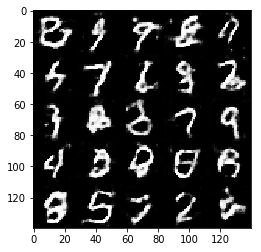

Epoch 2/2, Batch No 310, Discriminator Loss ========> 1.3686, Generator Loss ========> 0.6228
Epoch 2/2, Batch No 320, Discriminator Loss ========> 1.3093, Generator Loss ========> 0.7991
Epoch 2/2, Batch No 330, Discriminator Loss ========> 1.3808, Generator Loss ========> 0.6850
Epoch 2/2, Batch No 340, Discriminator Loss ========> 1.3404, Generator Loss ========> 0.6340
Epoch 2/2, Batch No 350, Discriminator Loss ========> 1.2841, Generator Loss ========> 0.7520
Epoch 2/2, Batch No 360, Discriminator Loss ========> 1.3153, Generator Loss ========> 0.5594
Epoch 2/2, Batch No 370, Discriminator Loss ========> 1.3080, Generator Loss ========> 0.7990
Epoch 2/2, Batch No 380, Discriminator Loss ========> 1.2570, Generator Loss ========> 1.0628
Epoch 2/2, Batch No 390, Discriminator Loss ========> 1.2339, Generator Loss ========> 0.8512
Epoch 2/2, Batch No 400, Discriminator Loss ========> 1.1875, Generator Loss ========> 0.7112


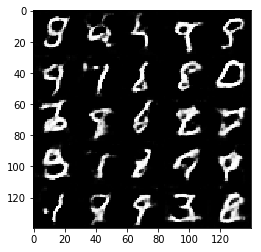

Epoch 2/2, Batch No 410, Discriminator Loss ========> 1.2050, Generator Loss ========> 0.7421
Epoch 2/2, Batch No 420, Discriminator Loss ========> 1.2894, Generator Loss ========> 0.9379
Epoch 2/2, Batch No 430, Discriminator Loss ========> 1.2392, Generator Loss ========> 1.1073
Epoch 2/2, Batch No 440, Discriminator Loss ========> 1.2103, Generator Loss ========> 0.7267
Epoch 2/2, Batch No 450, Discriminator Loss ========> 1.1983, Generator Loss ========> 0.7381
Epoch 2/2, Batch No 460, Discriminator Loss ========> 1.2951, Generator Loss ========> 1.1248
Epoch 2/2, Batch No 470, Discriminator Loss ========> 1.3071, Generator Loss ========> 0.7781
Epoch 2/2, Batch No 480, Discriminator Loss ========> 1.2902, Generator Loss ========> 0.5875
Epoch 2/2, Batch No 490, Discriminator Loss ========> 1.2646, Generator Loss ========> 0.6232
Epoch 2/2, Batch No 500, Discriminator Loss ========> 1.2345, Generator Loss ========> 0.7486


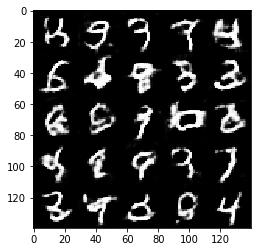

Epoch 2/2, Batch No 510, Discriminator Loss ========> 1.1806, Generator Loss ========> 0.8430
Epoch 2/2, Batch No 520, Discriminator Loss ========> 1.2734, Generator Loss ========> 1.0115
Epoch 2/2, Batch No 530, Discriminator Loss ========> 1.1904, Generator Loss ========> 0.6993
Epoch 2/2, Batch No 540, Discriminator Loss ========> 1.1653, Generator Loss ========> 0.8321
Epoch 2/2, Batch No 550, Discriminator Loss ========> 1.1785, Generator Loss ========> 0.8067
Epoch 2/2, Batch No 560, Discriminator Loss ========> 1.3037, Generator Loss ========> 0.9981
Epoch 2/2, Batch No 570, Discriminator Loss ========> 1.1540, Generator Loss ========> 0.7484
Epoch 2/2, Batch No 580, Discriminator Loss ========> 1.2739, Generator Loss ========> 0.5822
Epoch 2/2, Batch No 590, Discriminator Loss ========> 1.3250, Generator Loss ========> 0.5258
Epoch 2/2, Batch No 600, Discriminator Loss ========> 1.2815, Generator Loss ========> 0.5368


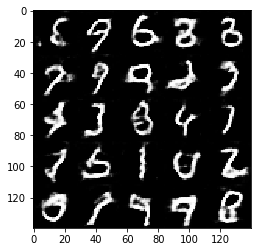

Epoch 2/2, Batch No 610, Discriminator Loss ========> 1.1507, Generator Loss ========> 0.7739
Epoch 2/2, Batch No 620, Discriminator Loss ========> 1.1720, Generator Loss ========> 0.6902
Epoch 2/2, Batch No 630, Discriminator Loss ========> 1.1816, Generator Loss ========> 1.0899
Epoch 2/2, Batch No 640, Discriminator Loss ========> 1.1692, Generator Loss ========> 0.7302
Epoch 2/2, Batch No 650, Discriminator Loss ========> 1.2353, Generator Loss ========> 0.6938
Epoch 2/2, Batch No 660, Discriminator Loss ========> 1.1520, Generator Loss ========> 0.9154
Epoch 2/2, Batch No 670, Discriminator Loss ========> 1.1668, Generator Loss ========> 0.8773
Epoch 2/2, Batch No 680, Discriminator Loss ========> 1.2645, Generator Loss ========> 0.7780
Epoch 2/2, Batch No 690, Discriminator Loss ========> 1.1535, Generator Loss ========> 0.9156
Epoch 2/2, Batch No 700, Discriminator Loss ========> 1.1754, Generator Loss ========> 0.8673


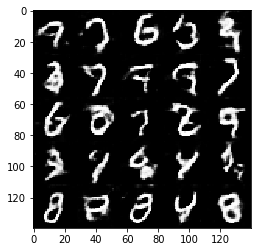

Epoch 2/2, Batch No 710, Discriminator Loss ========> 1.1673, Generator Loss ========> 0.7164
Epoch 2/2, Batch No 720, Discriminator Loss ========> 1.3619, Generator Loss ========> 0.9868
Epoch 2/2, Batch No 730, Discriminator Loss ========> 1.2773, Generator Loss ========> 0.7374
Epoch 2/2, Batch No 740, Discriminator Loss ========> 1.3378, Generator Loss ========> 0.5002
Epoch 2/2, Batch No 750, Discriminator Loss ========> 1.1624, Generator Loss ========> 0.7787
Epoch 2/2, Batch No 760, Discriminator Loss ========> 1.2486, Generator Loss ========> 0.6300
Epoch 2/2, Batch No 770, Discriminator Loss ========> 1.1991, Generator Loss ========> 0.7404
Epoch 2/2, Batch No 780, Discriminator Loss ========> 1.1840, Generator Loss ========> 0.7749
Epoch 2/2, Batch No 790, Discriminator Loss ========> 1.2235, Generator Loss ========> 0.7038
Epoch 2/2, Batch No 800, Discriminator Loss ========> 1.2487, Generator Loss ========> 0.6427


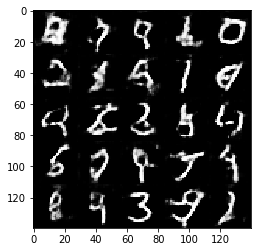

Epoch 2/2, Batch No 810, Discriminator Loss ========> 1.2054, Generator Loss ========> 0.8191
Epoch 2/2, Batch No 820, Discriminator Loss ========> 1.2181, Generator Loss ========> 0.9626
Epoch 2/2, Batch No 830, Discriminator Loss ========> 1.1472, Generator Loss ========> 0.7765
Epoch 2/2, Batch No 840, Discriminator Loss ========> 1.3193, Generator Loss ========> 0.5931
Epoch 2/2, Batch No 850, Discriminator Loss ========> 1.2031, Generator Loss ========> 0.7944
Epoch 2/2, Batch No 860, Discriminator Loss ========> 1.2331, Generator Loss ========> 0.7352
Epoch 2/2, Batch No 870, Discriminator Loss ========> 1.2497, Generator Loss ========> 0.7091
Epoch 2/2, Batch No 880, Discriminator Loss ========> 1.2643, Generator Loss ========> 0.6554
Epoch 2/2, Batch No 890, Discriminator Loss ========> 1.3200, Generator Loss ========> 0.5505
Epoch 2/2, Batch No 900, Discriminator Loss ========> 1.1731, Generator Loss ========> 0.7335


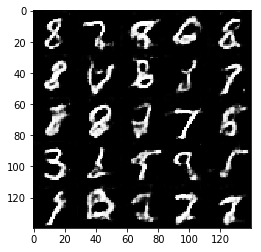

Epoch 2/2, Batch No 910, Discriminator Loss ========> 1.2685, Generator Loss ========> 0.6304
Epoch 2/2, Batch No 920, Discriminator Loss ========> 1.1511, Generator Loss ========> 0.8643
Epoch 2/2, Batch No 930, Discriminator Loss ========> 1.2798, Generator Loss ========> 0.9995


In [18]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.50


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches, 
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1, Batch No 10, Discriminator Loss ========> 1.0957, Generator Loss ========> 0.6355
Epoch 1/1, Batch No 20, Discriminator Loss ========> 0.9227, Generator Loss ========> 0.8792
Epoch 1/1, Batch No 30, Discriminator Loss ========> 0.5532, Generator Loss ========> 1.4507
Epoch 1/1, Batch No 40, Discriminator Loss ========> 0.3313, Generator Loss ========> 1.5396
Epoch 1/1, Batch No 50, Discriminator Loss ========> 1.2729, Generator Loss ========> 2.7247
Epoch 1/1, Batch No 60, Discriminator Loss ========> 0.9749, Generator Loss ========> 1.1167
Epoch 1/1, Batch No 70, Discriminator Loss ========> 1.0168, Generator Loss ========> 1.1159
Epoch 1/1, Batch No 80, Discriminator Loss ========> 1.2341, Generator Loss ========> 1.0201
Epoch 1/1, Batch No 90, Discriminator Loss ========> 1.3251, Generator Loss ========> 0.7926
Epoch 1/1, Batch No 100, Discriminator Loss ========> 1.2199, Generator Loss ========> 1.0007


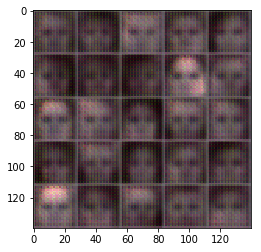

Epoch 1/1, Batch No 110, Discriminator Loss ========> 1.3001, Generator Loss ========> 0.7741
Epoch 1/1, Batch No 120, Discriminator Loss ========> 1.2613, Generator Loss ========> 0.8999
Epoch 1/1, Batch No 130, Discriminator Loss ========> 1.2396, Generator Loss ========> 0.7769
Epoch 1/1, Batch No 140, Discriminator Loss ========> 1.1819, Generator Loss ========> 0.8254
Epoch 1/1, Batch No 150, Discriminator Loss ========> 1.3315, Generator Loss ========> 0.7725
Epoch 1/1, Batch No 160, Discriminator Loss ========> 1.3573, Generator Loss ========> 0.6460
Epoch 1/1, Batch No 170, Discriminator Loss ========> 1.3973, Generator Loss ========> 0.5915
Epoch 1/1, Batch No 180, Discriminator Loss ========> 1.4867, Generator Loss ========> 0.4897
Epoch 1/1, Batch No 190, Discriminator Loss ========> 1.3883, Generator Loss ========> 0.5445
Epoch 1/1, Batch No 200, Discriminator Loss ========> 1.3538, Generator Loss ========> 0.5528


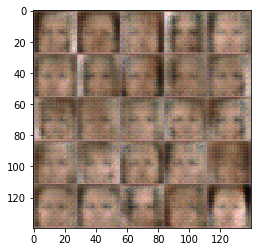

Epoch 1/1, Batch No 210, Discriminator Loss ========> 1.4543, Generator Loss ========> 0.4716
Epoch 1/1, Batch No 220, Discriminator Loss ========> 1.4252, Generator Loss ========> 0.5050
Epoch 1/1, Batch No 230, Discriminator Loss ========> 1.4063, Generator Loss ========> 0.5479
Epoch 1/1, Batch No 240, Discriminator Loss ========> 1.3815, Generator Loss ========> 0.5852
Epoch 1/1, Batch No 250, Discriminator Loss ========> 1.3949, Generator Loss ========> 0.5699
Epoch 1/1, Batch No 260, Discriminator Loss ========> 1.3350, Generator Loss ========> 0.5829
Epoch 1/1, Batch No 270, Discriminator Loss ========> 1.3582, Generator Loss ========> 0.6110
Epoch 1/1, Batch No 280, Discriminator Loss ========> 1.3616, Generator Loss ========> 0.6252
Epoch 1/1, Batch No 290, Discriminator Loss ========> 1.3641, Generator Loss ========> 0.6062
Epoch 1/1, Batch No 300, Discriminator Loss ========> 1.3589, Generator Loss ========> 0.6374


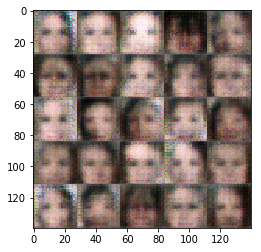

Epoch 1/1, Batch No 310, Discriminator Loss ========> 1.3685, Generator Loss ========> 0.6271
Epoch 1/1, Batch No 320, Discriminator Loss ========> 1.4179, Generator Loss ========> 0.6238
Epoch 1/1, Batch No 330, Discriminator Loss ========> 1.3018, Generator Loss ========> 0.6639
Epoch 1/1, Batch No 340, Discriminator Loss ========> 1.3739, Generator Loss ========> 0.6328
Epoch 1/1, Batch No 350, Discriminator Loss ========> 1.3741, Generator Loss ========> 0.6257
Epoch 1/1, Batch No 360, Discriminator Loss ========> 1.3810, Generator Loss ========> 0.6421
Epoch 1/1, Batch No 370, Discriminator Loss ========> 1.4353, Generator Loss ========> 0.6457
Epoch 1/1, Batch No 380, Discriminator Loss ========> 1.3523, Generator Loss ========> 0.6217
Epoch 1/1, Batch No 390, Discriminator Loss ========> 1.4463, Generator Loss ========> 0.6205
Epoch 1/1, Batch No 400, Discriminator Loss ========> 1.3286, Generator Loss ========> 0.7390


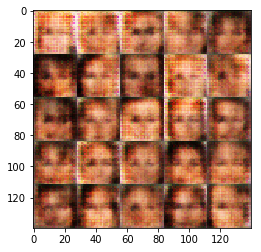

Epoch 1/1, Batch No 410, Discriminator Loss ========> 1.4914, Generator Loss ========> 0.6003
Epoch 1/1, Batch No 420, Discriminator Loss ========> 1.3170, Generator Loss ========> 0.7019
Epoch 1/1, Batch No 430, Discriminator Loss ========> 1.4237, Generator Loss ========> 0.6021
Epoch 1/1, Batch No 440, Discriminator Loss ========> 1.4107, Generator Loss ========> 0.6204
Epoch 1/1, Batch No 450, Discriminator Loss ========> 1.3852, Generator Loss ========> 0.6741
Epoch 1/1, Batch No 460, Discriminator Loss ========> 1.4100, Generator Loss ========> 0.6009
Epoch 1/1, Batch No 470, Discriminator Loss ========> 1.3608, Generator Loss ========> 0.6298
Epoch 1/1, Batch No 480, Discriminator Loss ========> 1.4558, Generator Loss ========> 0.6399
Epoch 1/1, Batch No 490, Discriminator Loss ========> 1.3616, Generator Loss ========> 0.6709
Epoch 1/1, Batch No 500, Discriminator Loss ========> 1.3873, Generator Loss ========> 0.6353


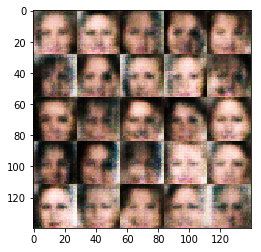

Epoch 1/1, Batch No 510, Discriminator Loss ========> 1.3931, Generator Loss ========> 0.6086
Epoch 1/1, Batch No 520, Discriminator Loss ========> 1.3598, Generator Loss ========> 0.6498
Epoch 1/1, Batch No 530, Discriminator Loss ========> 1.4626, Generator Loss ========> 0.6247
Epoch 1/1, Batch No 540, Discriminator Loss ========> 1.3073, Generator Loss ========> 0.7170
Epoch 1/1, Batch No 550, Discriminator Loss ========> 1.4212, Generator Loss ========> 0.6152
Epoch 1/1, Batch No 560, Discriminator Loss ========> 1.3975, Generator Loss ========> 0.6369
Epoch 1/1, Batch No 570, Discriminator Loss ========> 1.3706, Generator Loss ========> 0.6409
Epoch 1/1, Batch No 580, Discriminator Loss ========> 1.4253, Generator Loss ========> 0.6321
Epoch 1/1, Batch No 590, Discriminator Loss ========> 1.3299, Generator Loss ========> 0.7233
Epoch 1/1, Batch No 600, Discriminator Loss ========> 1.4175, Generator Loss ========> 0.6339


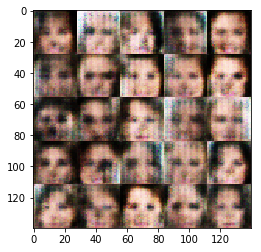

Epoch 1/1, Batch No 610, Discriminator Loss ========> 1.3610, Generator Loss ========> 0.6485
Epoch 1/1, Batch No 620, Discriminator Loss ========> 1.3849, Generator Loss ========> 0.6346
Epoch 1/1, Batch No 630, Discriminator Loss ========> 1.3924, Generator Loss ========> 0.6958
Epoch 1/1, Batch No 640, Discriminator Loss ========> 1.3713, Generator Loss ========> 0.6954
Epoch 1/1, Batch No 650, Discriminator Loss ========> 1.4127, Generator Loss ========> 0.6142
Epoch 1/1, Batch No 660, Discriminator Loss ========> 1.3435, Generator Loss ========> 0.6227
Epoch 1/1, Batch No 670, Discriminator Loss ========> 1.4061, Generator Loss ========> 0.6361
Epoch 1/1, Batch No 680, Discriminator Loss ========> 1.4105, Generator Loss ========> 0.6803
Epoch 1/1, Batch No 690, Discriminator Loss ========> 1.3983, Generator Loss ========> 0.6443
Epoch 1/1, Batch No 700, Discriminator Loss ========> 1.3647, Generator Loss ========> 0.6328


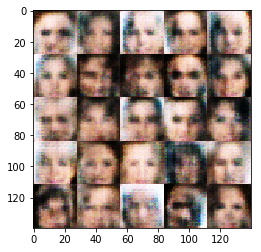

Epoch 1/1, Batch No 710, Discriminator Loss ========> 1.3928, Generator Loss ========> 0.6472
Epoch 1/1, Batch No 720, Discriminator Loss ========> 1.3976, Generator Loss ========> 0.6983
Epoch 1/1, Batch No 730, Discriminator Loss ========> 1.4058, Generator Loss ========> 0.6540
Epoch 1/1, Batch No 740, Discriminator Loss ========> 1.3793, Generator Loss ========> 0.6333
Epoch 1/1, Batch No 750, Discriminator Loss ========> 1.3849, Generator Loss ========> 0.6316
Epoch 1/1, Batch No 760, Discriminator Loss ========> 1.3726, Generator Loss ========> 0.7024
Epoch 1/1, Batch No 770, Discriminator Loss ========> 1.4045, Generator Loss ========> 0.6742
Epoch 1/1, Batch No 780, Discriminator Loss ========> 1.3574, Generator Loss ========> 0.6133
Epoch 1/1, Batch No 790, Discriminator Loss ========> 1.4034, Generator Loss ========> 0.6357
Epoch 1/1, Batch No 800, Discriminator Loss ========> 1.4010, Generator Loss ========> 0.6935


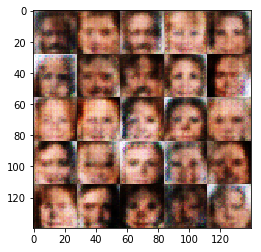

Epoch 1/1, Batch No 810, Discriminator Loss ========> 1.3603, Generator Loss ========> 0.6670
Epoch 1/1, Batch No 820, Discriminator Loss ========> 1.3715, Generator Loss ========> 0.6223
Epoch 1/1, Batch No 830, Discriminator Loss ========> 1.3572, Generator Loss ========> 0.6608
Epoch 1/1, Batch No 840, Discriminator Loss ========> 1.4173, Generator Loss ========> 0.6609
Epoch 1/1, Batch No 850, Discriminator Loss ========> 1.3578, Generator Loss ========> 0.6537
Epoch 1/1, Batch No 860, Discriminator Loss ========> 1.4084, Generator Loss ========> 0.6114
Epoch 1/1, Batch No 870, Discriminator Loss ========> 1.3707, Generator Loss ========> 0.6928
Epoch 1/1, Batch No 880, Discriminator Loss ========> 1.4203, Generator Loss ========> 0.6176
Epoch 1/1, Batch No 890, Discriminator Loss ========> 1.4090, Generator Loss ========> 0.5855
Epoch 1/1, Batch No 900, Discriminator Loss ========> 1.3695, Generator Loss ========> 0.6945


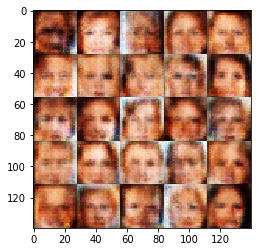

Epoch 1/1, Batch No 910, Discriminator Loss ========> 1.4216, Generator Loss ========> 0.6348
Epoch 1/1, Batch No 920, Discriminator Loss ========> 1.3553, Generator Loss ========> 0.6420
Epoch 1/1, Batch No 930, Discriminator Loss ========> 1.4134, Generator Loss ========> 0.6097
Epoch 1/1, Batch No 940, Discriminator Loss ========> 1.3702, Generator Loss ========> 0.6818
Epoch 1/1, Batch No 950, Discriminator Loss ========> 1.4103, Generator Loss ========> 0.6894
Epoch 1/1, Batch No 960, Discriminator Loss ========> 1.3883, Generator Loss ========> 0.6641
Epoch 1/1, Batch No 970, Discriminator Loss ========> 1.4062, Generator Loss ========> 0.6002
Epoch 1/1, Batch No 980, Discriminator Loss ========> 1.3878, Generator Loss ========> 0.6738
Epoch 1/1, Batch No 990, Discriminator Loss ========> 1.3985, Generator Loss ========> 0.6594
Epoch 1/1, Batch No 1000, Discriminator Loss ========> 1.3692, Generator Loss ========> 0.6402


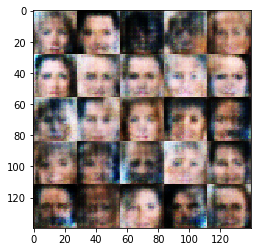

Epoch 1/1, Batch No 1010, Discriminator Loss ========> 1.3954, Generator Loss ========> 0.6103
Epoch 1/1, Batch No 1020, Discriminator Loss ========> 1.3563, Generator Loss ========> 0.6491
Epoch 1/1, Batch No 1030, Discriminator Loss ========> 1.3990, Generator Loss ========> 0.6623
Epoch 1/1, Batch No 1040, Discriminator Loss ========> 1.3813, Generator Loss ========> 0.6619
Epoch 1/1, Batch No 1050, Discriminator Loss ========> 1.4019, Generator Loss ========> 0.6196
Epoch 1/1, Batch No 1060, Discriminator Loss ========> 1.3789, Generator Loss ========> 0.6487
Epoch 1/1, Batch No 1070, Discriminator Loss ========> 1.3841, Generator Loss ========> 0.6717
Epoch 1/1, Batch No 1080, Discriminator Loss ========> 1.3816, Generator Loss ========> 0.6614
Epoch 1/1, Batch No 1090, Discriminator Loss ========> 1.3793, Generator Loss ========> 0.6279
Epoch 1/1, Batch No 1100, Discriminator Loss ========> 1.3746, Generator Loss ========> 0.6476


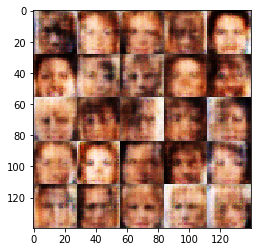

Epoch 1/1, Batch No 1110, Discriminator Loss ========> 1.4045, Generator Loss ========> 0.6543
Epoch 1/1, Batch No 1120, Discriminator Loss ========> 1.3795, Generator Loss ========> 0.6501
Epoch 1/1, Batch No 1130, Discriminator Loss ========> 1.3812, Generator Loss ========> 0.6329
Epoch 1/1, Batch No 1140, Discriminator Loss ========> 1.3578, Generator Loss ========> 0.6778
Epoch 1/1, Batch No 1150, Discriminator Loss ========> 1.4021, Generator Loss ========> 0.6515
Epoch 1/1, Batch No 1160, Discriminator Loss ========> 1.3793, Generator Loss ========> 0.6424
Epoch 1/1, Batch No 1170, Discriminator Loss ========> 1.4187, Generator Loss ========> 0.6053
Epoch 1/1, Batch No 1180, Discriminator Loss ========> 1.3724, Generator Loss ========> 0.6708
Epoch 1/1, Batch No 1190, Discriminator Loss ========> 1.4017, Generator Loss ========> 0.6522
Epoch 1/1, Batch No 1200, Discriminator Loss ========> 1.3514, Generator Loss ========> 0.6476


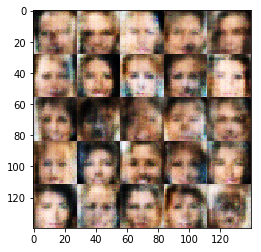

Epoch 1/1, Batch No 1210, Discriminator Loss ========> 1.4077, Generator Loss ========> 0.6425
Epoch 1/1, Batch No 1220, Discriminator Loss ========> 1.3606, Generator Loss ========> 0.6646
Epoch 1/1, Batch No 1230, Discriminator Loss ========> 1.3974, Generator Loss ========> 0.6435
Epoch 1/1, Batch No 1240, Discriminator Loss ========> 1.3626, Generator Loss ========> 0.6166
Epoch 1/1, Batch No 1250, Discriminator Loss ========> 1.3874, Generator Loss ========> 0.6462
Epoch 1/1, Batch No 1260, Discriminator Loss ========> 1.3787, Generator Loss ========> 0.6511
Epoch 1/1, Batch No 1270, Discriminator Loss ========> 1.3852, Generator Loss ========> 0.6513
Epoch 1/1, Batch No 1280, Discriminator Loss ========> 1.3608, Generator Loss ========> 0.6249
Epoch 1/1, Batch No 1290, Discriminator Loss ========> 1.3759, Generator Loss ========> 0.6755
Epoch 1/1, Batch No 1300, Discriminator Loss ========> 1.3966, Generator Loss ========> 0.6338


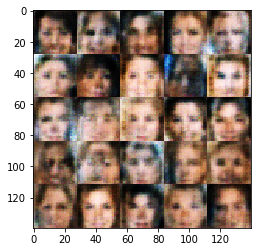

Epoch 1/1, Batch No 1310, Discriminator Loss ========> 1.3621, Generator Loss ========> 0.6439
Epoch 1/1, Batch No 1320, Discriminator Loss ========> 1.3914, Generator Loss ========> 0.6769
Epoch 1/1, Batch No 1330, Discriminator Loss ========> 1.3626, Generator Loss ========> 0.6568
Epoch 1/1, Batch No 1340, Discriminator Loss ========> 1.3679, Generator Loss ========> 0.6245
Epoch 1/1, Batch No 1350, Discriminator Loss ========> 1.4154, Generator Loss ========> 0.6419
Epoch 1/1, Batch No 1360, Discriminator Loss ========> 1.3599, Generator Loss ========> 0.6789
Epoch 1/1, Batch No 1370, Discriminator Loss ========> 1.3827, Generator Loss ========> 0.6327
Epoch 1/1, Batch No 1380, Discriminator Loss ========> 1.4015, Generator Loss ========> 0.5950
Epoch 1/1, Batch No 1390, Discriminator Loss ========> 1.3629, Generator Loss ========> 0.6818
Epoch 1/1, Batch No 1400, Discriminator Loss ========> 1.4014, Generator Loss ========> 0.6375


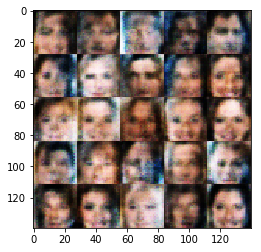

Epoch 1/1, Batch No 1410, Discriminator Loss ========> 1.3640, Generator Loss ========> 0.6226
Epoch 1/1, Batch No 1420, Discriminator Loss ========> 1.3772, Generator Loss ========> 0.6777
Epoch 1/1, Batch No 1430, Discriminator Loss ========> 1.3852, Generator Loss ========> 0.6300
Epoch 1/1, Batch No 1440, Discriminator Loss ========> 1.3678, Generator Loss ========> 0.6101
Epoch 1/1, Batch No 1450, Discriminator Loss ========> 1.3808, Generator Loss ========> 0.6908
Epoch 1/1, Batch No 1460, Discriminator Loss ========> 1.3894, Generator Loss ========> 0.6433
Epoch 1/1, Batch No 1470, Discriminator Loss ========> 1.3890, Generator Loss ========> 0.5864
Epoch 1/1, Batch No 1480, Discriminator Loss ========> 1.3545, Generator Loss ========> 0.6775
Epoch 1/1, Batch No 1490, Discriminator Loss ========> 1.3901, Generator Loss ========> 0.6380
Epoch 1/1, Batch No 1500, Discriminator Loss ========> 1.4491, Generator Loss ========> 0.6085


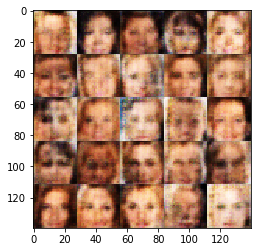

Epoch 1/1, Batch No 1510, Discriminator Loss ========> 1.3489, Generator Loss ========> 0.6608
Epoch 1/1, Batch No 1520, Discriminator Loss ========> 1.3773, Generator Loss ========> 0.6267
Epoch 1/1, Batch No 1530, Discriminator Loss ========> 1.3985, Generator Loss ========> 0.6416
Epoch 1/1, Batch No 1540, Discriminator Loss ========> 1.3696, Generator Loss ========> 0.6474
Epoch 1/1, Batch No 1550, Discriminator Loss ========> 1.3546, Generator Loss ========> 0.6214
Epoch 1/1, Batch No 1560, Discriminator Loss ========> 1.3905, Generator Loss ========> 0.7040
Epoch 1/1, Batch No 1570, Discriminator Loss ========> 1.3717, Generator Loss ========> 0.6452
Epoch 1/1, Batch No 1580, Discriminator Loss ========> 1.3669, Generator Loss ========> 0.5960
Epoch 1/1, Batch No 1590, Discriminator Loss ========> 1.3866, Generator Loss ========> 0.6562
Epoch 1/1, Batch No 1600, Discriminator Loss ========> 1.3702, Generator Loss ========> 0.6467


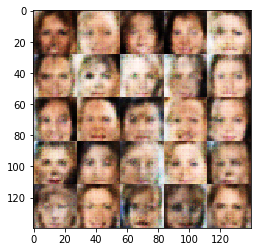

Epoch 1/1, Batch No 1610, Discriminator Loss ========> 1.3799, Generator Loss ========> 0.6176
Epoch 1/1, Batch No 1620, Discriminator Loss ========> 1.3687, Generator Loss ========> 0.6444
Epoch 1/1, Batch No 1630, Discriminator Loss ========> 1.3698, Generator Loss ========> 0.6444
Epoch 1/1, Batch No 1640, Discriminator Loss ========> 1.3715, Generator Loss ========> 0.6178
Epoch 1/1, Batch No 1650, Discriminator Loss ========> 1.3740, Generator Loss ========> 0.6452
Epoch 1/1, Batch No 1660, Discriminator Loss ========> 1.3548, Generator Loss ========> 0.6562
Epoch 1/1, Batch No 1670, Discriminator Loss ========> 1.3772, Generator Loss ========> 0.6136
Epoch 1/1, Batch No 1680, Discriminator Loss ========> 1.3739, Generator Loss ========> 0.6226
Epoch 1/1, Batch No 1690, Discriminator Loss ========> 1.3677, Generator Loss ========> 0.6242
Epoch 1/1, Batch No 1700, Discriminator Loss ========> 1.3638, Generator Loss ========> 0.6218


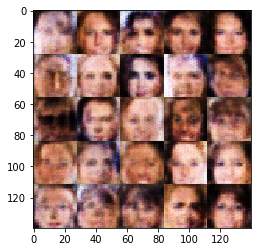

Epoch 1/1, Batch No 1710, Discriminator Loss ========> 1.3756, Generator Loss ========> 0.6591
Epoch 1/1, Batch No 1720, Discriminator Loss ========> 1.3761, Generator Loss ========> 0.6322
Epoch 1/1, Batch No 1730, Discriminator Loss ========> 1.4029, Generator Loss ========> 0.6413
Epoch 1/1, Batch No 1740, Discriminator Loss ========> 1.3378, Generator Loss ========> 0.7247
Epoch 1/1, Batch No 1750, Discriminator Loss ========> 1.3979, Generator Loss ========> 0.6425
Epoch 1/1, Batch No 1760, Discriminator Loss ========> 1.4459, Generator Loss ========> 0.5889
Epoch 1/1, Batch No 1770, Discriminator Loss ========> 1.3839, Generator Loss ========> 0.6367
Epoch 1/1, Batch No 1780, Discriminator Loss ========> 1.3613, Generator Loss ========> 0.6292
Epoch 1/1, Batch No 1790, Discriminator Loss ========> 1.3801, Generator Loss ========> 0.6370
Epoch 1/1, Batch No 1800, Discriminator Loss ========> 1.3778, Generator Loss ========> 0.6787


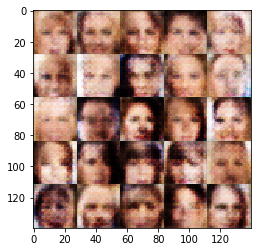

Epoch 1/1, Batch No 1810, Discriminator Loss ========> 1.3625, Generator Loss ========> 0.6978
Epoch 1/1, Batch No 1820, Discriminator Loss ========> 1.3893, Generator Loss ========> 0.6443
Epoch 1/1, Batch No 1830, Discriminator Loss ========> 1.3750, Generator Loss ========> 0.6516
Epoch 1/1, Batch No 1840, Discriminator Loss ========> 1.4081, Generator Loss ========> 0.6397
Epoch 1/1, Batch No 1850, Discriminator Loss ========> 1.4298, Generator Loss ========> 0.5801
Epoch 1/1, Batch No 1860, Discriminator Loss ========> 1.3929, Generator Loss ========> 0.6277
Epoch 1/1, Batch No 1870, Discriminator Loss ========> 1.3885, Generator Loss ========> 0.5612
Epoch 1/1, Batch No 1880, Discriminator Loss ========> 1.3469, Generator Loss ========> 0.6915
Epoch 1/1, Batch No 1890, Discriminator Loss ========> 1.4147, Generator Loss ========> 0.5960
Epoch 1/1, Batch No 1900, Discriminator Loss ========> 1.3823, Generator Loss ========> 0.6579


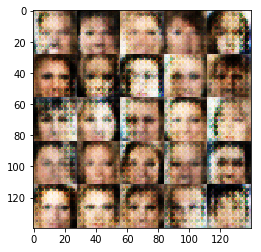

Epoch 1/1, Batch No 1910, Discriminator Loss ========> 1.3685, Generator Loss ========> 0.7261
Epoch 1/1, Batch No 1920, Discriminator Loss ========> 1.4155, Generator Loss ========> 0.6244
Epoch 1/1, Batch No 1930, Discriminator Loss ========> 1.3837, Generator Loss ========> 0.6285
Epoch 1/1, Batch No 1940, Discriminator Loss ========> 1.3711, Generator Loss ========> 0.6754
Epoch 1/1, Batch No 1950, Discriminator Loss ========> 1.3823, Generator Loss ========> 0.6720
Epoch 1/1, Batch No 1960, Discriminator Loss ========> 1.3809, Generator Loss ========> 0.6472
Epoch 1/1, Batch No 1970, Discriminator Loss ========> 1.3801, Generator Loss ========> 0.6683
Epoch 1/1, Batch No 1980, Discriminator Loss ========> 1.3885, Generator Loss ========> 0.6535
Epoch 1/1, Batch No 1990, Discriminator Loss ========> 1.3696, Generator Loss ========> 0.6537
Epoch 1/1, Batch No 2000, Discriminator Loss ========> 1.3746, Generator Loss ========> 0.6476


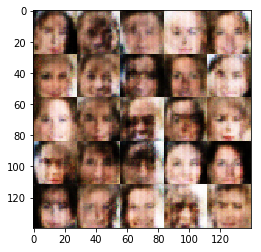

Epoch 1/1, Batch No 2010, Discriminator Loss ========> 1.3813, Generator Loss ========> 0.6760
Epoch 1/1, Batch No 2020, Discriminator Loss ========> 1.3698, Generator Loss ========> 0.6371
Epoch 1/1, Batch No 2030, Discriminator Loss ========> 1.3729, Generator Loss ========> 0.6151
Epoch 1/1, Batch No 2040, Discriminator Loss ========> 1.3916, Generator Loss ========> 0.6568
Epoch 1/1, Batch No 2050, Discriminator Loss ========> 1.3654, Generator Loss ========> 0.5982
Epoch 1/1, Batch No 2060, Discriminator Loss ========> 1.3588, Generator Loss ========> 0.7008
Epoch 1/1, Batch No 2070, Discriminator Loss ========> 1.4127, Generator Loss ========> 0.6210
Epoch 1/1, Batch No 2080, Discriminator Loss ========> 1.3745, Generator Loss ========> 0.6489
Epoch 1/1, Batch No 2090, Discriminator Loss ========> 1.3765, Generator Loss ========> 0.6889
Epoch 1/1, Batch No 2100, Discriminator Loss ========> 1.3985, Generator Loss ========> 0.6635


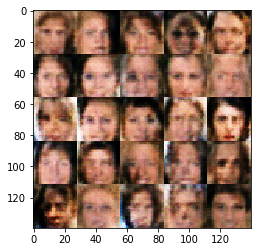

Epoch 1/1, Batch No 2110, Discriminator Loss ========> 1.3728, Generator Loss ========> 0.6287
Epoch 1/1, Batch No 2120, Discriminator Loss ========> 1.4085, Generator Loss ========> 0.6395
Epoch 1/1, Batch No 2130, Discriminator Loss ========> 1.3811, Generator Loss ========> 0.6733
Epoch 1/1, Batch No 2140, Discriminator Loss ========> 1.3788, Generator Loss ========> 0.5899
Epoch 1/1, Batch No 2150, Discriminator Loss ========> 1.3868, Generator Loss ========> 0.6981
Epoch 1/1, Batch No 2160, Discriminator Loss ========> 1.3877, Generator Loss ========> 0.6391
Epoch 1/1, Batch No 2170, Discriminator Loss ========> 1.3831, Generator Loss ========> 0.6292
Epoch 1/1, Batch No 2180, Discriminator Loss ========> 1.4032, Generator Loss ========> 0.6326
Epoch 1/1, Batch No 2190, Discriminator Loss ========> 1.3733, Generator Loss ========> 0.7085
Epoch 1/1, Batch No 2200, Discriminator Loss ========> 1.4027, Generator Loss ========> 0.6181


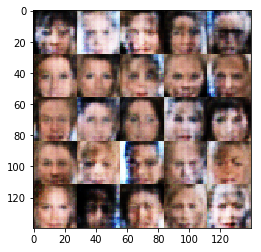

Epoch 1/1, Batch No 2210, Discriminator Loss ========> 1.3863, Generator Loss ========> 0.6242
Epoch 1/1, Batch No 2220, Discriminator Loss ========> 1.3828, Generator Loss ========> 0.6811
Epoch 1/1, Batch No 2230, Discriminator Loss ========> 1.3899, Generator Loss ========> 0.6319
Epoch 1/1, Batch No 2240, Discriminator Loss ========> 1.3688, Generator Loss ========> 0.6249
Epoch 1/1, Batch No 2250, Discriminator Loss ========> 1.3840, Generator Loss ========> 0.6690
Epoch 1/1, Batch No 2260, Discriminator Loss ========> 1.3752, Generator Loss ========> 0.6552
Epoch 1/1, Batch No 2270, Discriminator Loss ========> 1.3853, Generator Loss ========> 0.6016
Epoch 1/1, Batch No 2280, Discriminator Loss ========> 1.3870, Generator Loss ========> 0.6645
Epoch 1/1, Batch No 2290, Discriminator Loss ========> 1.3761, Generator Loss ========> 0.6625
Epoch 1/1, Batch No 2300, Discriminator Loss ========> 1.3807, Generator Loss ========> 0.6265


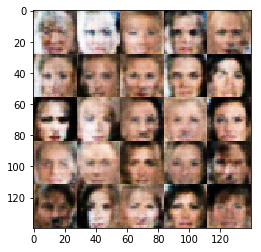

Epoch 1/1, Batch No 2310, Discriminator Loss ========> 1.3831, Generator Loss ========> 0.6701
Epoch 1/1, Batch No 2320, Discriminator Loss ========> 1.3832, Generator Loss ========> 0.6570
Epoch 1/1, Batch No 2330, Discriminator Loss ========> 1.3696, Generator Loss ========> 0.6065
Epoch 1/1, Batch No 2340, Discriminator Loss ========> 1.3820, Generator Loss ========> 0.7074
Epoch 1/1, Batch No 2350, Discriminator Loss ========> 1.4040, Generator Loss ========> 0.6137
Epoch 1/1, Batch No 2360, Discriminator Loss ========> 1.3828, Generator Loss ========> 0.6131
Epoch 1/1, Batch No 2370, Discriminator Loss ========> 1.3959, Generator Loss ========> 0.6981
Epoch 1/1, Batch No 2380, Discriminator Loss ========> 1.3939, Generator Loss ========> 0.6069
Epoch 1/1, Batch No 2390, Discriminator Loss ========> 1.3773, Generator Loss ========> 0.6852
Epoch 1/1, Batch No 2400, Discriminator Loss ========> 1.4001, Generator Loss ========> 0.6409


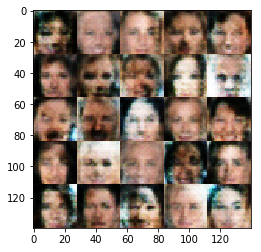

Epoch 1/1, Batch No 2410, Discriminator Loss ========> 1.3766, Generator Loss ========> 0.6246
Epoch 1/1, Batch No 2420, Discriminator Loss ========> 1.3828, Generator Loss ========> 0.7114
Epoch 1/1, Batch No 2430, Discriminator Loss ========> 1.4018, Generator Loss ========> 0.6163
Epoch 1/1, Batch No 2440, Discriminator Loss ========> 1.3549, Generator Loss ========> 0.6116
Epoch 1/1, Batch No 2450, Discriminator Loss ========> 1.3858, Generator Loss ========> 0.7167
Epoch 1/1, Batch No 2460, Discriminator Loss ========> 1.4167, Generator Loss ========> 0.6091
Epoch 1/1, Batch No 2470, Discriminator Loss ========> 1.3806, Generator Loss ========> 0.6046
Epoch 1/1, Batch No 2480, Discriminator Loss ========> 1.3668, Generator Loss ========> 0.6944
Epoch 1/1, Batch No 2490, Discriminator Loss ========> 1.3989, Generator Loss ========> 0.6448
Epoch 1/1, Batch No 2500, Discriminator Loss ========> 1.3517, Generator Loss ========> 0.6345


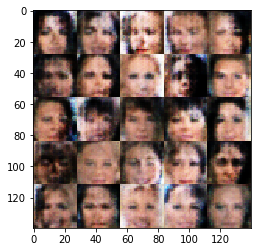

Epoch 1/1, Batch No 2510, Discriminator Loss ========> 1.3701, Generator Loss ========> 0.7029
Epoch 1/1, Batch No 2520, Discriminator Loss ========> 1.3840, Generator Loss ========> 0.6378
Epoch 1/1, Batch No 2530, Discriminator Loss ========> 1.3999, Generator Loss ========> 0.6082
Epoch 1/1, Batch No 2540, Discriminator Loss ========> 1.3904, Generator Loss ========> 0.6509
Epoch 1/1, Batch No 2550, Discriminator Loss ========> 1.3955, Generator Loss ========> 0.6294
Epoch 1/1, Batch No 2560, Discriminator Loss ========> 1.3830, Generator Loss ========> 0.6489
Epoch 1/1, Batch No 2570, Discriminator Loss ========> 1.4011, Generator Loss ========> 0.6581
Epoch 1/1, Batch No 2580, Discriminator Loss ========> 1.3786, Generator Loss ========> 0.6493
Epoch 1/1, Batch No 2590, Discriminator Loss ========> 1.3756, Generator Loss ========> 0.6651
Epoch 1/1, Batch No 2600, Discriminator Loss ========> 1.3869, Generator Loss ========> 0.6524


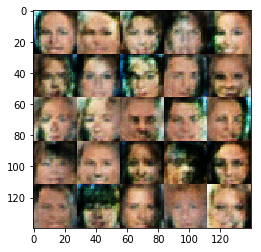

Epoch 1/1, Batch No 2610, Discriminator Loss ========> 1.3738, Generator Loss ========> 0.6370
Epoch 1/1, Batch No 2620, Discriminator Loss ========> 1.3737, Generator Loss ========> 0.6783
Epoch 1/1, Batch No 2630, Discriminator Loss ========> 1.3970, Generator Loss ========> 0.6288
Epoch 1/1, Batch No 2640, Discriminator Loss ========> 1.3865, Generator Loss ========> 0.6280
Epoch 1/1, Batch No 2650, Discriminator Loss ========> 1.4033, Generator Loss ========> 0.6517
Epoch 1/1, Batch No 2660, Discriminator Loss ========> 1.3622, Generator Loss ========> 0.6395
Epoch 1/1, Batch No 2670, Discriminator Loss ========> 1.3445, Generator Loss ========> 0.7205
Epoch 1/1, Batch No 2680, Discriminator Loss ========> 1.3871, Generator Loss ========> 0.6229
Epoch 1/1, Batch No 2690, Discriminator Loss ========> 1.3895, Generator Loss ========> 0.6483
Epoch 1/1, Batch No 2700, Discriminator Loss ========> 1.3902, Generator Loss ========> 0.6586


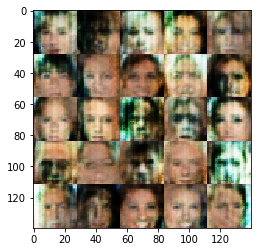

Epoch 1/1, Batch No 2710, Discriminator Loss ========> 1.3423, Generator Loss ========> 0.6329
Epoch 1/1, Batch No 2720, Discriminator Loss ========> 1.3991, Generator Loss ========> 0.6514
Epoch 1/1, Batch No 2730, Discriminator Loss ========> 1.3928, Generator Loss ========> 0.6475
Epoch 1/1, Batch No 2740, Discriminator Loss ========> 1.3730, Generator Loss ========> 0.6186
Epoch 1/1, Batch No 2750, Discriminator Loss ========> 1.3816, Generator Loss ========> 0.6836
Epoch 1/1, Batch No 2760, Discriminator Loss ========> 1.3888, Generator Loss ========> 0.6527
Epoch 1/1, Batch No 2770, Discriminator Loss ========> 1.3731, Generator Loss ========> 0.6276
Epoch 1/1, Batch No 2780, Discriminator Loss ========> 1.3684, Generator Loss ========> 0.7013
Epoch 1/1, Batch No 2790, Discriminator Loss ========> 1.3812, Generator Loss ========> 0.6150
Epoch 1/1, Batch No 2800, Discriminator Loss ========> 1.3696, Generator Loss ========> 0.6559


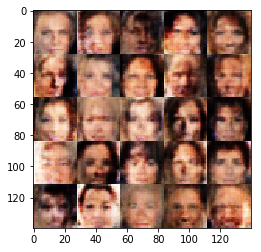

Epoch 1/1, Batch No 2810, Discriminator Loss ========> 1.3711, Generator Loss ========> 0.6648
Epoch 1/1, Batch No 2820, Discriminator Loss ========> 1.3883, Generator Loss ========> 0.6057
Epoch 1/1, Batch No 2830, Discriminator Loss ========> 1.3848, Generator Loss ========> 0.6785
Epoch 1/1, Batch No 2840, Discriminator Loss ========> 1.3975, Generator Loss ========> 0.6175
Epoch 1/1, Batch No 2850, Discriminator Loss ========> 1.3783, Generator Loss ========> 0.6425
Epoch 1/1, Batch No 2860, Discriminator Loss ========> 1.3938, Generator Loss ========> 0.6492
Epoch 1/1, Batch No 2870, Discriminator Loss ========> 1.4000, Generator Loss ========> 0.6217
Epoch 1/1, Batch No 2880, Discriminator Loss ========> 1.4055, Generator Loss ========> 0.6543
Epoch 1/1, Batch No 2890, Discriminator Loss ========> 1.3770, Generator Loss ========> 0.6014
Epoch 1/1, Batch No 2900, Discriminator Loss ========> 1.3787, Generator Loss ========> 0.7163


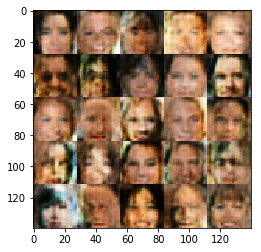

Epoch 1/1, Batch No 2910, Discriminator Loss ========> 1.3544, Generator Loss ========> 0.6366
Epoch 1/1, Batch No 2920, Discriminator Loss ========> 1.3766, Generator Loss ========> 0.6407
Epoch 1/1, Batch No 2930, Discriminator Loss ========> 1.4005, Generator Loss ========> 0.6384
Epoch 1/1, Batch No 2940, Discriminator Loss ========> 1.3634, Generator Loss ========> 0.6151
Epoch 1/1, Batch No 2950, Discriminator Loss ========> 1.3806, Generator Loss ========> 0.6967
Epoch 1/1, Batch No 2960, Discriminator Loss ========> 1.3903, Generator Loss ========> 0.6154
Epoch 1/1, Batch No 2970, Discriminator Loss ========> 1.3985, Generator Loss ========> 0.6388
Epoch 1/1, Batch No 2980, Discriminator Loss ========> 1.3897, Generator Loss ========> 0.6881
Epoch 1/1, Batch No 2990, Discriminator Loss ========> 1.3888, Generator Loss ========> 0.6058
Epoch 1/1, Batch No 3000, Discriminator Loss ========> 1.3770, Generator Loss ========> 0.6974


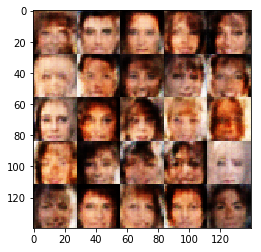

Epoch 1/1, Batch No 3010, Discriminator Loss ========> 1.3714, Generator Loss ========> 0.6337
Epoch 1/1, Batch No 3020, Discriminator Loss ========> 1.3860, Generator Loss ========> 0.6179
Epoch 1/1, Batch No 3030, Discriminator Loss ========> 1.3547, Generator Loss ========> 0.6920
Epoch 1/1, Batch No 3040, Discriminator Loss ========> 1.3767, Generator Loss ========> 0.6238
Epoch 1/1, Batch No 3050, Discriminator Loss ========> 1.3703, Generator Loss ========> 0.6730
Epoch 1/1, Batch No 3060, Discriminator Loss ========> 1.3924, Generator Loss ========> 0.6253
Epoch 1/1, Batch No 3070, Discriminator Loss ========> 1.3796, Generator Loss ========> 0.6854
Epoch 1/1, Batch No 3080, Discriminator Loss ========> 1.3833, Generator Loss ========> 0.6120
Epoch 1/1, Batch No 3090, Discriminator Loss ========> 1.3816, Generator Loss ========> 0.6696
Epoch 1/1, Batch No 3100, Discriminator Loss ========> 1.4112, Generator Loss ========> 0.6274


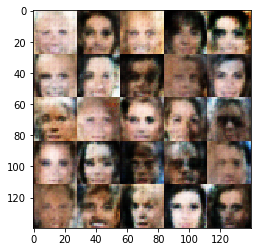

Epoch 1/1, Batch No 3110, Discriminator Loss ========> 1.4002, Generator Loss ========> 0.6608
Epoch 1/1, Batch No 3120, Discriminator Loss ========> 1.4126, Generator Loss ========> 0.6283
Epoch 1/1, Batch No 3130, Discriminator Loss ========> 1.3656, Generator Loss ========> 0.6099
Epoch 1/1, Batch No 3140, Discriminator Loss ========> 1.3728, Generator Loss ========> 0.6857
Epoch 1/1, Batch No 3150, Discriminator Loss ========> 1.3716, Generator Loss ========> 0.6336
Epoch 1/1, Batch No 3160, Discriminator Loss ========> 1.3960, Generator Loss ========> 0.6660


In [19]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.50


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.